<a href="https://colab.research.google.com/github/clint-bg/tools/blob/main/ConfidenceIntervals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Confidence Intervals
This sheet attempts to explain the difference between **confidence intervals on the mean** of a population (observations from a given process) and **confidence intervals on a model parameter** used to predict a response.

In practical terms, when evaluating observed measurements, I view the confidence interval on the mean of that data as how well I know that average value and thus I could assess if I need to take more data. When looking at a parameter, the confidence interval is related to how impactful the parameter is on the predicted outcome.

-Clint Guymon, BYU Chemical Engineering Department, July 2022

In [1]:
#import needed packages
from ipywidgets import interact
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import numpy as np
import pandas as pd
from scipy.stats import t,f #import Student t distribution methods
from scipy.optimize import fsolve,minimize #sse minimizer 

## Confidence Interval on the Mean of Observations
Observations are made ubiquitously with the increasing documentation and recording of those observations driving much of the artificial intelligence that uses those observations to make predictions. 

The confidence interval on the average or mean of those quantified observations can depend on the distribution from which those obserservations are made. The **Central Limit Theorem** establishes that the methods used for statistical conclusions based on the normal distribution can usually be applied to scenarios that may not be generated from a normal distribution. It is assumed to be so in the discussion here.

### Example
Suppose I'm measuring the outlet temperature of a heat exchanger and I have the following data

*  What is the average or mean outlet temperature? 
*  What is the confidence interval on that average outlet temperature?
*  How much better would you know the mean if instead of the relatively small sample of temperatures you took, you took many more? Or, what would your confidence interval on the mean be with many more recorded observations?

In [2]:
initialtemps = [75.2,80.1,76.8,78.4,79.0]

#### Average or Mean Outlet Temperature

In [3]:
meantemperature = np.mean(initialtemps)

#### Confidence Interval on that Mean Outlet Temperature

In [4]:
#first calculate the standard deviation and then the standard error
sdev = np.std(initialtemps)
stderr = sdev/np.sqrt(len(initialtemps))
ci = stderr*t.interval(0.95,len(initialtemps))[1]
#the t.interval yields the cutoff for the 95% confidence interval for the Student t distribution (at high degrees of freedom, it converges to the normal result)

In [5]:
print(f'The average or mean outlet temperature with {len(initialtemps)} recorded observations is {meantemperature:.1f} plus/minus {ci:.1f}.')

The average or mean outlet temperature with 5 recorded observations is 77.9 plus/minus 2.0.


#### Effect of Many More Observations
I will use the statistical measures of the above 5 temperatures to generate many more observations sampled from a normal distribution.

In [6]:
moretemps = t.rvs(1000,size=100)*sdev+meantemperature #1000 degrees of freedom used to give the same result as the normal distribution, also, used the previous mean and stdev to generate the numbers
exampleoutlettemps = np.append(initialtemps,moretemps)
exampleoutlettemps[:50]

array([75.2       , 80.1       , 76.8       , 78.4       , 79.        ,
       78.63680502, 75.24510531, 78.27569116, 77.04612673, 81.91356535,
       76.90124073, 76.86559334, 79.06175619, 78.02872866, 78.36119977,
       78.76788741, 76.30276989, 76.18249042, 79.54761946, 77.18289198,
       75.41016989, 76.92382261, 76.81921695, 76.3412413 , 74.88960414,
       79.99479248, 75.78685357, 80.03883695, 75.9998475 , 76.60194318,
       77.7603671 , 75.58869524, 81.20630328, 75.32444511, 77.59055601,
       77.56249377, 76.84973051, 76.27553574, 73.76283147, 78.60794571,
       79.07361438, 79.14082474, 77.37092322, 76.67680749, 77.15118464,
       78.89748819, 78.35507248, 80.90384704, 76.16184806, 76.32928058])

In [7]:
meantemperatureL = np.mean(exampleoutlettemps)
sdevL = np.std(exampleoutlettemps)
stderrL = sdevL/np.sqrt(len(exampleoutlettemps))
ciL = stderrL*t.interval(0.95,len(exampleoutlettemps))[1]
print(f'Now with a greater amount of samples, the average or mean outlet temperature with {len(exampleoutlettemps)} recorded observations is {meantemperatureL:.1f} plus/minus {ciL:.1f}.')

Now with a greater amount of samples, the average or mean outlet temperature with 105 recorded observations is 77.8 plus/minus 0.3.


Comparing the two results, the average values and the standard deviations are similar but the confidence interval is significantly lower. That is, with more observations, we are much more confident in the mean or average exit temperature from the heat exchanger.

In [8]:
#stats for (5 and 105) samples
print(f'The confidence intervales for 5 and 105 samples, respectively: +/- {ci:.1f},{ciL:.1f}')
print(f'The average temperature for 5 and 105 samples, respectively: {meantemperature:.1f},{meantemperatureL:.1f}')
print(f'The standard deviation for 5 and 105 samples, respectively: {sdev:.1f},{sdevL:.1f}')

The confidence intervales for 5 and 105 samples, respectively: +/- 2.0,0.3
The average temperature for 5 and 105 samples, respectively: 77.9,77.8
The standard deviation for 5 and 105 samples, respectively: 1.7,1.6


Note that the fact that the above average and standard deviation values are similar between 5 and 105 samples is because I set it up that way (the other values were generated from a mean and stdev equal to that for the 5 samples). If the wasn't the case, it's expected that the standard deviation and mean could show a greater difference than what is portrayed above.

#### Interactive Slider Indicating Sampe Size Effect on the Confidence Interval
Below is a slider with associated code demonstrating the above.

In [9]:
@interact(n=(5,500))
def cifn(n):
  othertemps = t.rvs(1000,size=n-5)*np.std(initialtemps)+meantemperature #1000 degrees of freedom used to give the same result as the normal distribution, also, used the previous mean and stdev to generate the numbers
  temps = np.append(initialtemps,othertemps)
  sdev = np.std(temps)
  stderr = sdev/np.sqrt(len(temps))
  ci = stderr*t.interval(0.95,len(temps))[1]
  print(f'The mean is {np.mean(temps):.1f} +/- {ci:.1f} with standard deviation of {sdev:.1f}')

interactive(children=(IntSlider(value=252, description='n', max=500, min=5), Output()), _dom_classes=('widget-…

### Standard Error versus Standard Deviation
As exhibited in the above example, **the standard deviation may not indicate how well you know the average** or mean temperature (but it can indicate the distribution of values observed). The standard error on the other hand, is a measure of how well you know the mean and is simply the ratio of the standard deviation and the sqrt of the number of observations.

I have been confused by these two values in the past (and sometimes in the present). When calculating the confidence interval on the mean of observations, make sure to either use the standard error with the typical 1.96 or 2 value or divide the standard deviation by the sqrt of the number of observations before multiplying by the 1.96 or 2 factor to get confidence intervals.

### Normal versus the Student t Distribution
The normal distrution relates the probability of an observational value given the mean and standard deviation from that population. When the standard deviation is well known, the normal distribution parameters are usually used in calculating the confidence intervals. For example, for a two-sided tail, a 95% confidence interval corresponds to a normalized value of 1.96 (or 2) that is typically used. 

However, if the standard deviation isn't well known, the Student t distribution is used to account for that uncertainty. It accounts for the number of degrees of freedom (or observations) to yield a value to use for the confidence interval (instead of the typical 1.96 or 2 used for the two-tail 95% C.I.).

Below is an interactive slider that can be used to compare the two distributions.

In [10]:
#Create an interactive plot (not seen in GitHub but can be manipulated in Google Colab)
@interact(mean=(60,80),standarddev=(0.5,1.5),df=(1,10))
def normalplot(mean,standarddev,df):
  xlin =  (np.linspace(mean-7*standarddev, mean+7*standarddev, 200)-mean)/standarddev
  ylin = t.pdf(xlin,1000)/standarddev
  ylin2 = t.pdf(xlin,df)/standarddev
  plt.plot(xlin*standarddev+mean, ylin, 'r', label='Normal Distribution'); 
  plt.plot(xlin*standarddev+mean, ylin2, 'b', label='Student t Distribution');
  plt.xlabel("mean"); plt.ylabel("probability")
  plt.xlim(50,90); plt.ylim(0,1)
  plt.legend(); plt.show()


interactive(children=(IntSlider(value=70, description='mean', max=80, min=60), FloatSlider(value=1.0, descript…

## Confidence Interval on a Parameter in a Model
**A model could be a simple line relating one independent variable to a dependent variable**. For example, the concentration of a species can linearly relate to the rate of a first order reaction at a constant temperature.  Or, a model could yield a non-linear relationship (for example a second order reaction). 

Additionally, a model may have several parameters, for example the Arrhenius parameters in a second order reaction. Or, for a machine learning application, models can have millions of parameters.

### Obtain the Parameter Value(s)
A curve fit by minimizing the sum of the squared errors is typically completed to determine the parameter value(s). Once the parameter value is determined, it can be valuable to detemine the uncertainty in that parameter value. 

First we'll set up a generic example to find the a linear parameter by minimizing the sum of the squared errors using scipy's minimize (we could use gekko as well).

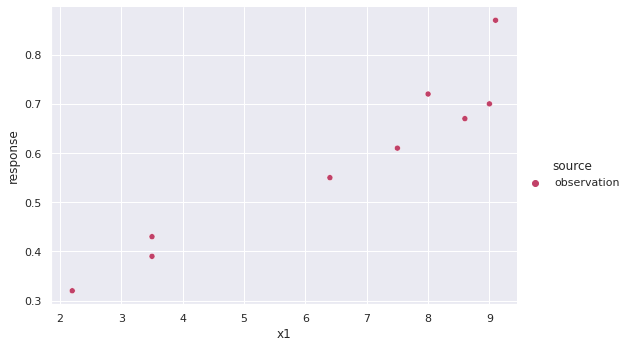

In [11]:
data = pd.DataFrame({'response':[0.32,0.43,0.39,0.55,0.67,0.87,0.7,0.61,0.72], 'x1':[2.2,3.5,3.5,6.4,8.6,9.1,9.0,7.5,8.0]})
data['source'] = 'observation'
p = sns.relplot(x='x1', y='response', hue='source', palette='flare', data=data, aspect=15/10);
plt.show()

In [12]:
def linearSSE(x):
  #calculate sum of squared errors for a linear fit
  prediction = data['x1']*x[1] + x[0]
  sse = ((prediction - data['response'])**2).sum()
  return sse

In [13]:
optparametervals =  minimize(linearSSE,[1,1]).x
optparametervals #listed first is the optimal intercept and then the slope

array([0.1766029 , 0.06350474])

In [14]:
prediction = pd.DataFrame({'x1':np.linspace(data['x1'].min(),data['x1'].max(),50)})
prediction['response'] = prediction['x1']*optparametervals[1] + optparametervals[0]
prediction['source'] = 'prediction'

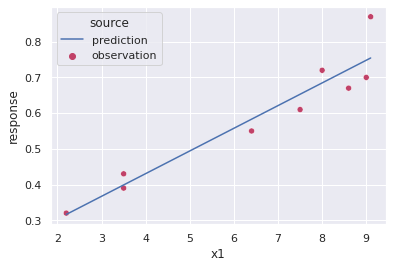

In [15]:
fig, ax = plt.subplots()
p = sns.scatterplot(x='x1',y='response',hue='source',palette='flare',data=data,ax=ax);
p = sns.lineplot(x='x1',y='response',hue='source',data=prediction,ax=ax)
plt.show()

### Obtain limits around each Parameter Value 
Limits around each parameter value are found that gives a SSE within the value that is not statistically different per the F test:
$\frac{SSE(\theta)-SSE(\theta^*)}{SSE(\theta^*)} \le \frac{p}{n-p}\cdot F(\alpha,p,n-p)$

where the $SSE$ is the sum of squared error given a set a parameter values $\theta$, $\theta^*$ is the parameter values that give the lowest $SSE$. $n$ is the number of data points, $p$ the number of parameters, and F is the scipy.f.isf function that specifies the important value that indicates whether one parameters set is significantly different from another. See also the very helpful info and demonstrations on AP Monitor: https://apmonitor.com/che263/index.php/Main/PythonRegressionStatistics.

For the example above with two parameters for the linear fit, below is the method used to determine the confidence interval on the slope and the intercept. Afterwards, the results are also compared to a typical ANOVA analysis.

In [16]:
#find the allowed deviation (right hand side of the above equation at two-sided 95% confidence interval)
ssedev = len(optparametervals)/(len(data)-len(optparametervals))*f.isf(0.05,len(optparametervals),(len(data)-len(optparametervals)))

In [17]:
optimalSSE = minimize(linearSSE,[1,1]).fun
#setup function to obtain confidence limits based on the F-test

In [18]:
#define equation to solve for varying one parameter at a time
def func(x,*input):
  dct = input[0]
  if dct['switch'] == 'intercept':
    out = (linearSSE([x,dct['slope']]) - optimalSSE)/optimalSSE - ssedev
  else:
    out = (linearSSE([dct['intercept'],x]) - optimalSSE)/optimalSSE - ssedev
  return out

In [19]:
#solve for the parameter yielding the desired SSE to establish the confidence intervals
guesses = np.linspace(-10,10,20)
args = {'slope':optparametervals[1],'intercept':optparametervals[0],'switch':'intercept'}
interceptvals = [fsolve(func,guess*optparametervals[0],args=(args))[0] for guess in guesses]
args['switch'] = ''
slopevals = [fsolve(func,guess*optparametervals[1],args=(args))[0] for guess in guesses]
minmax_b = [min(interceptvals),max(interceptvals)]
minmax_m = [min(slopevals),max(slopevals)]

In [20]:
#These are the optimal (lowest SSE) for the intercept and slope for the above data
optparametervals

array([0.1766029 , 0.06350474])

In [21]:
#The 95% confidence range on the intercept, b, and the slope, m, are the following
dict_CL = {'Method':['Ftest'],'InterceptRange':[minmax_b[1]-minmax_b[0]],'SlopeRange':[minmax_m[1]-minmax_m[0]],\
           'PercentVarOptimalSSE':[max([(linearSSE([each,optparametervals[1]]) - optimalSSE)/optimalSSE for each in minmax_b])]}
dict_CL

{'InterceptRange': [0.11936213602405392],
 'Method': ['Ftest'],
 'PercentVarOptimalSSE': [1.3535468936503128],
 'SlopeRange': [0.017302292907417187]}

Note that the above limits are equivalently spaced from the optimal value which is expected as the above function is linear. The result would not be expected if the function is non-linear.

Now randomly (from the normal distribution) select two values from the slope and intercept and plot them on the above plot showing they are equally as valid statistically as the optimal result.

In [22]:
ips = [t.rvs(1000)*((minmax_b[1]-minmax_b[0])/(1.96*2)) + optparametervals[0] for i in range(2)]
sps = [t.rvs(1000)*((minmax_m[1]-minmax_m[0])/(1.96*2)) + optparametervals[1] for i in range(2)]

In [23]:
ips,sps

([0.15064368920616916, 0.1712027751580772],
 [0.0664399551948239, 0.06053303182800942])

In [24]:
# for each of those random conditions, check that the F-test is satisfied, first 
def Ftestcheck(x):
  lhs = (linearSSE(x) - optimalSSE)/optimalSSE
  if lhs <= ssedev:
    out = True
  else:
    out = False
  return out

In [25]:
[Ftestcheck([ips[i],sps[i]]) for i,each in enumerate(ips)]

[True, True]

In [26]:
p2 = pd.DataFrame({'x1':np.linspace(data['x1'].min(),data['x1'].max(),50)})
p3 = pd.DataFrame({'x1':np.linspace(data['x1'].min(),data['x1'].max(),50)})
p2['response'] = p2['x1']*sps[0] + ips[0]
p3['response'] = p3['x1']*sps[1] + ips[1]
p2['source'] = '2nd prediction'; p3['source'] = '3rd prediction'

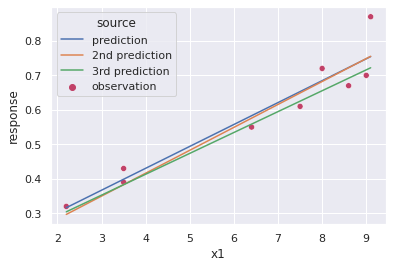

In [27]:
fig, ax = plt.subplots()
p = sns.scatterplot(x='x1',y='response',hue='source',palette='flare',data=data,ax=ax);
p = sns.lineplot(x='x1',y='response',hue='source',data=pd.concat([prediction,p2,p3],ignore_index=True),ax=ax)
plt.show()

### Compare to the OLS Statsmodel

In [28]:
# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [29]:
# Fit the model
model = ols("response ~ x1", data).fit()
print(model.summary())
# Peform analysis of variance on fitted linear model
#anova_results = anova_lm(model)
#print('\nANOVA results')
#print(anova_results)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     68.08
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           7.48e-05
Time:                        19:33:50   Log-Likelihood:                 13.960
No. Observations:                   9   AIC:                            -23.92
Df Residuals:                       7   BIC:                            -23.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1766      0.053      3.326      0.0

In [30]:
model.conf_int() #confidence interval with the statsmodel, ols method

,0,1
Intercept,0.051052,0.302154
x1,0.045305,0.081704


In [31]:
#add results to the results dictionary
dict_CL['Method'].append('OLS'); dict_CL['InterceptRange'].append(model.conf_int()[1][0]-model.conf_int()[0][0])
dict_CL['SlopeRange'].append(model.conf_int()[1][1]-model.conf_int()[0][1])
SSEdevarray = [linearSSE([model.conf_int()[1][0],optparametervals[1]]),linearSSE([model.conf_int()[0][0],optparametervals[1]])]
dict_CL['PercentVarOptimalSSE'].append(max([(each - optimalSSE)/optimalSSE for each in SSEdevarray]))

### Manual Calculation 
Since the OLS model apparently has much larger confidence limits than the F-test method, we'll also manually calculate the confidence limits for the slope and intercept from the data based on the method in Engineering Statistics by D. Montgomery et al.

In [34]:
#First calcualte the errors to evaluate how standard or normal they are.
error = data['response'] - (data['x1']*optparametervals[1] + optparametervals[0])
np.mean(error),np.std(error)

(7.45069892202663e-09, 0.05129794092907307)

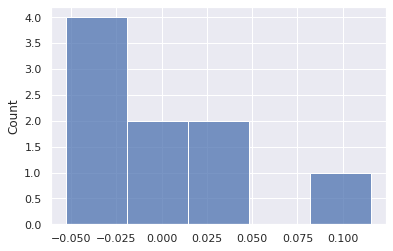

In [35]:
sns.histplot(data=error,bins=5)

Although the mean error is zero, the distribution of errors does not appear to be normal but there are only 9 data points. As such, the confidence limits are only estimates.

In [36]:
#calculate the statistics measures from the data 
Sxx = (data['x1'] - data['x1'].mean())**2
confL = t.ppf(0.975,len(data)-len(optparametervals))
var = np.std(error)**2
tmults = confL*np.sqrt(var/Sxx.sum())
tmulti = confL*np.sqrt(var*(1/len(data)+data['x1'].mean()**2/Sxx.sum()))
minterceptCL = optparametervals[0]-tmulti,optparametervals[0]+tmulti
mslopeCL = (optparametervals[1]-tmults, optparametervals[1]+tmults)

In [37]:
#Add results and build dataframe with the different confidence limits with the different methods
dict_CL['Method'].append('Sxx'); dict_CL['InterceptRange'].append(minterceptCL[1]-minterceptCL[0])
dict_CL['SlopeRange'].append(mslopeCL[1]-mslopeCL[0])
dict_CL['PercentVarOptimalSSE'].append(max([(linearSSE([each,optparametervals[1]]) - optimalSSE)/optimalSSE for each in minterceptCL]))

In [43]:
dfs = pd.DataFrame(dict_CL)

In [44]:
dfs

,Method,InterceptRange,SlopeRange,PercentVarOptimalSSE
0,Ftest,0.119362,0.017302,1.353547
1,OLS,0.251102,0.036399,5.990214
2,Sxx,0.221451,0.032101,4.659033


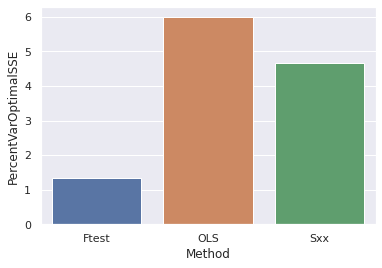

In [47]:
sns.barplot(x="Method", y="PercentVarOptimalSSE", data=dfs)
#g = sns.catplot(x="sex", y="total_bill",hue="smoker", col="time",data=dfs,kind="bar",aspect=.7);

### Now plot a contour plot of the SSE or the SSE-OptimalSSE/OptimalSSE
Plot a contour plot with the different values of the slope and intercept. Code here adapted from APMonitor https://apmonitor.com/che263/index.php/Main/PythonRegressionStatistics

In [39]:
#setup code for contour plot
nopts = 100
intercepts = np.linspace(model.conf_int()[0][0],model.conf_int()[1][0],nopts)
slopes = np.linspace(model.conf_int()[0][1],model.conf_int()[1][1],nopts)
xgrid, ygrid = np.meshgrid(intercepts, slopes)

# sum of squared errors
sse = np.empty((nopts,nopts)); lhs = np.empty((nopts,nopts))
for i in range(nopts):
    for j in range(nopts):
        at = xgrid[i,j]
        bt = ygrid[i,j]
        sse[i,j] = linearSSE([at,bt])
        lhs[i,j] = (sse[i,j] - optimalSSE)/optimalSSE

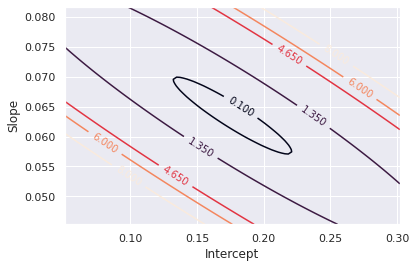

In [49]:
plt.figure()
cplot = plt.contour(xgrid,ygrid,lhs,[0.10,1.35,4.65,6,8])
plt.clabel(cplot, inline=1, fontsize=10)
plt.xlabel('Intercept')
plt.ylabel('Slope')
plt.show()